In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

In [2]:
import math

def entropy( x, b ):
    s = 0
    for p in x:
        if p > 0:
            s += -p*math.log(p,b)
        # end
    # end
    return s
# end

def visualize_regions(model, MAX, nGrid):
    a1 = np.linspace(-MAX, MAX, nGrid)
    a2 = np.linspace(-MAX, MAX, nGrid)

    A1, A2 = np.meshgrid(a1, a2)
    A1 = A1.flatten()
    A2 = A2.flatten()
    A = np.vstack((A1, A2)).T

    # Predict B
    B = model.predict(A)
    B = B.reshape(nGrid, nGrid)
    B = np.flipud(B)

    # Compute entropy for S
    prob_2D = model.predict_proba(A)
    S = np.array([entropy(p, 2) for p in prob_2D])
    S = S.reshape(nGrid, nGrid)
    S = np.flipud(S)

    return B, S
# end
    
def GenerateData(n_pts1,n_pts2,center_sep,std):
    
    cov = std**2*np.eye(2)
    
    x1 = np.random.multivariate_normal(mean=[-center_sep/2,0],
                                       cov=cov,
                                       size=n_pts1)
    y1 = np.zeros(n_pts1)
    
    x2 = np.random.multivariate_normal(mean=[center_sep/2,0],
                                       cov=cov,
                                       size=n_pts2)
    y2 = np.ones(n_pts2)
    
    X = np.concatenate((x1,x2),axis=0)
    y = np.concatenate((y1,y2),axis=0).astype(int)
    
    return X, y
# end

# Create data

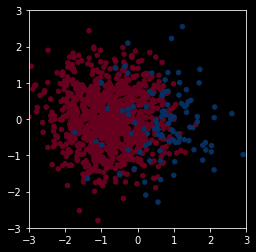

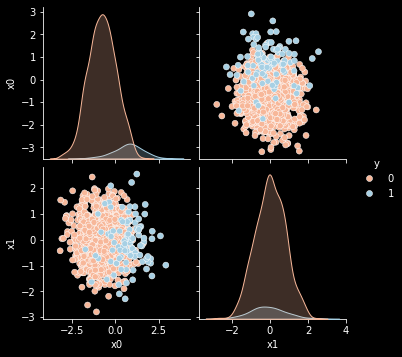

In [3]:
#np.random.seed(0)

n_pts0     = 1000
n_pts1     = 100
std        = 0.8
center_sep = 1.5

# generate data
X, y = GenerateData(
    n_pts0,
    n_pts1,
    center_sep,
    std
)

MAX = np.max(np.abs(X))

cmap = 'RdBu'

plt_scale = 3
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap=cmap)
plt.xlim(-plt_scale,plt_scale)
plt.ylim(-plt_scale,plt_scale)
plt.gca().set_aspect('equal')
plt.show()

df = pd.DataFrame( {"x0":X[:,0], "x1":X[:,1], "y":y} )
sns.pairplot(df, hue='y', palette='RdBu')
plt.show()

# Modeling w/ class weights

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y)

LogisticRegression(class_weight={0: 0.9722222222222222,
                                 1: 0.027777777777777776})


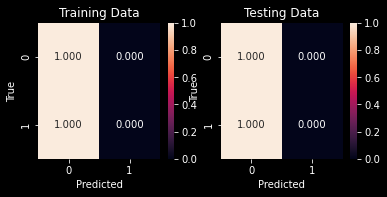

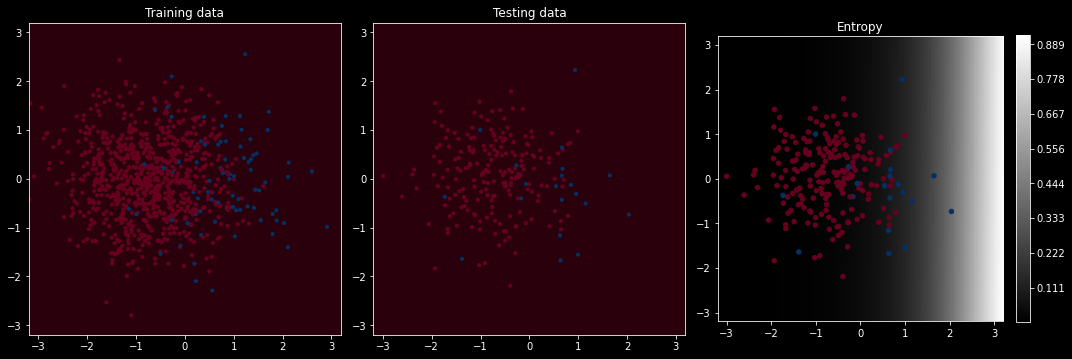

LogisticRegression(class_weight={0: 0.9444444444444444, 1: 0.05555555555555555})


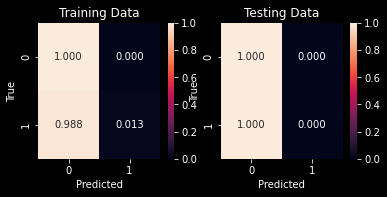

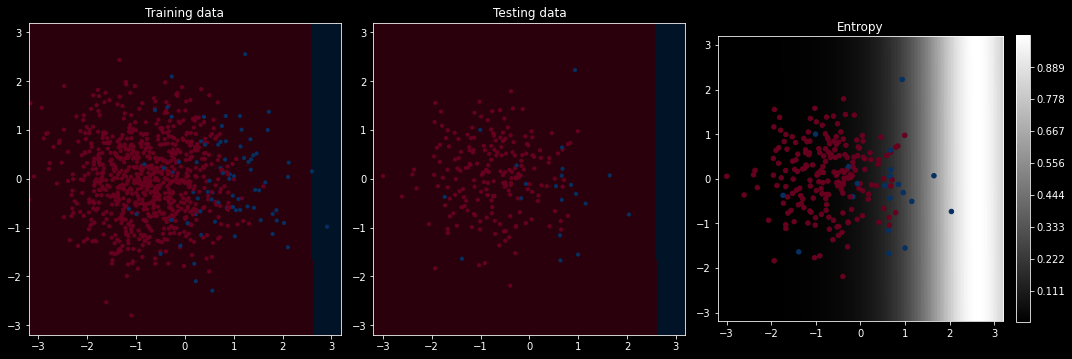

LogisticRegression(class_weight={0: 0.9166666666666666, 1: 0.08333333333333333})


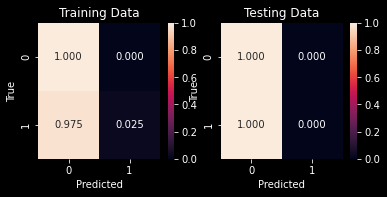

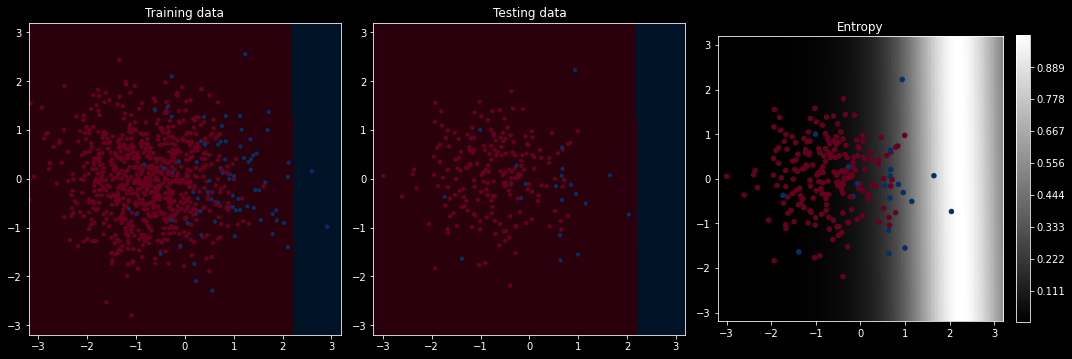

LogisticRegression(class_weight={0: 0.8888888888888888, 1: 0.1111111111111111})


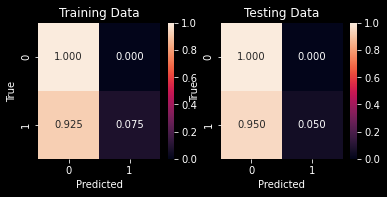

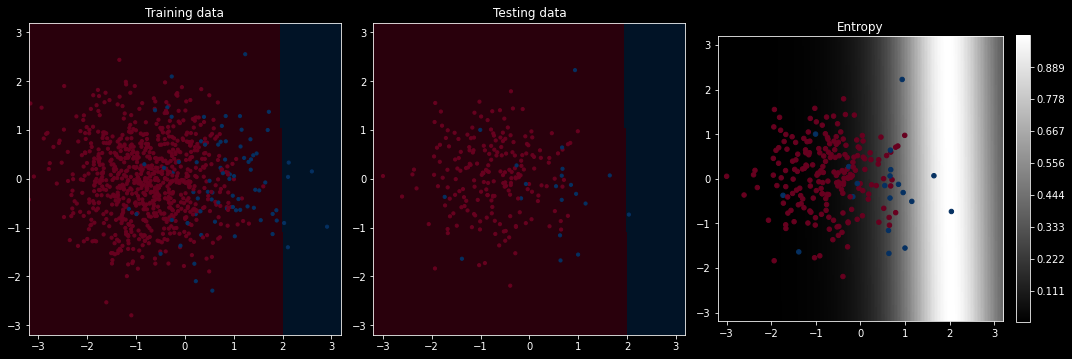

LogisticRegression(class_weight={0: 0.8611111111111112, 1: 0.1388888888888889})


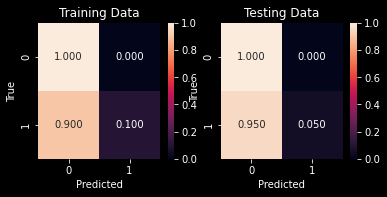

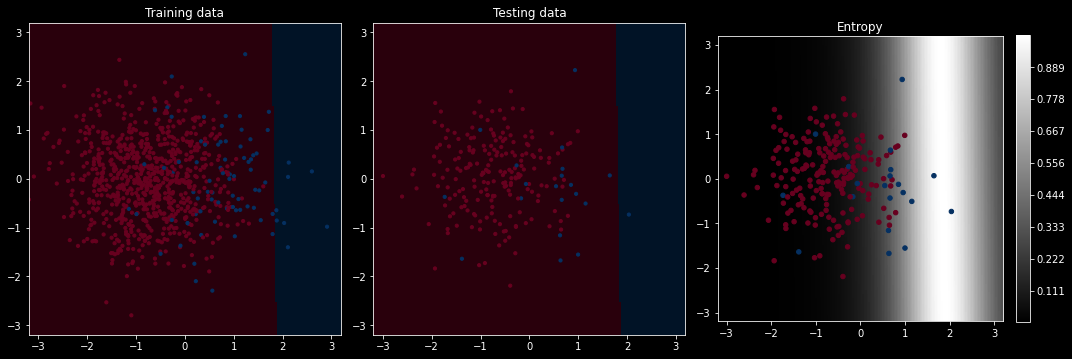

LogisticRegression(class_weight={0: 0.8333333333333334, 1: 0.16666666666666666})


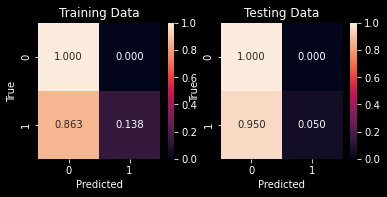

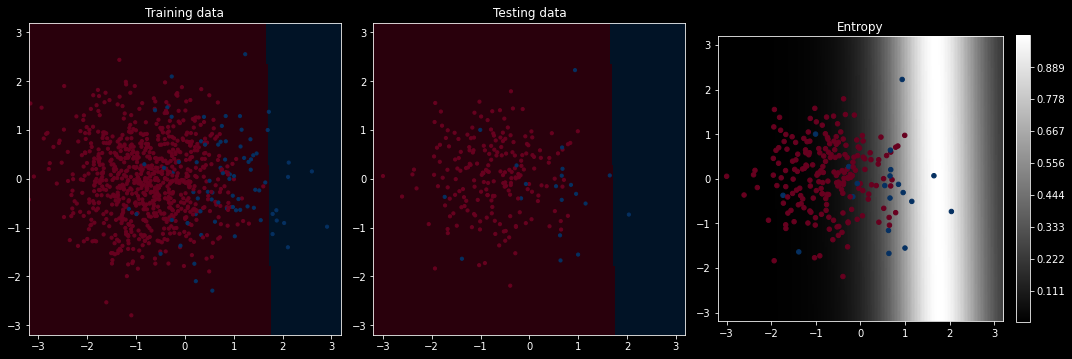

LogisticRegression(class_weight={0: 0.8055555555555556, 1: 0.19444444444444442})


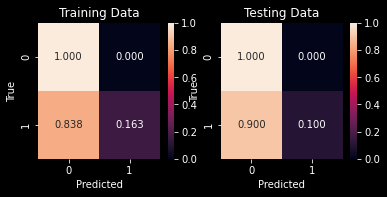

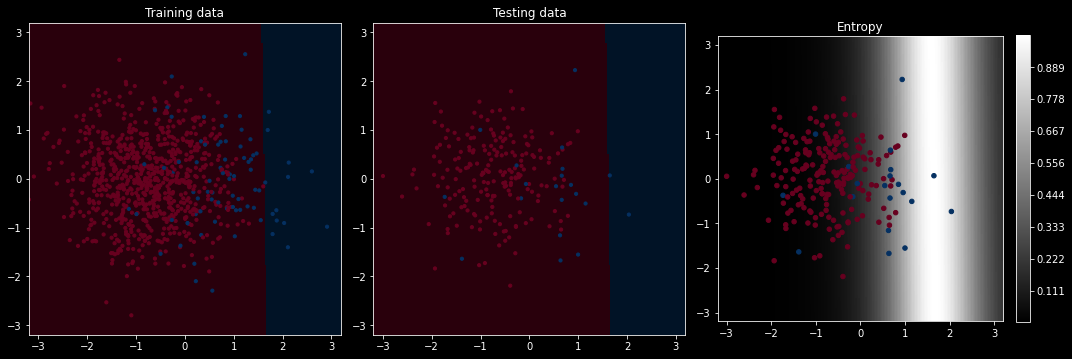

LogisticRegression(class_weight={0: 0.7777777777777778, 1: 0.2222222222222222})


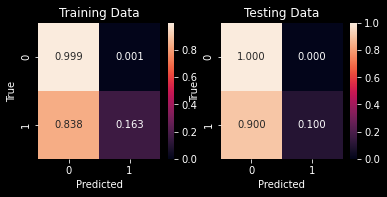

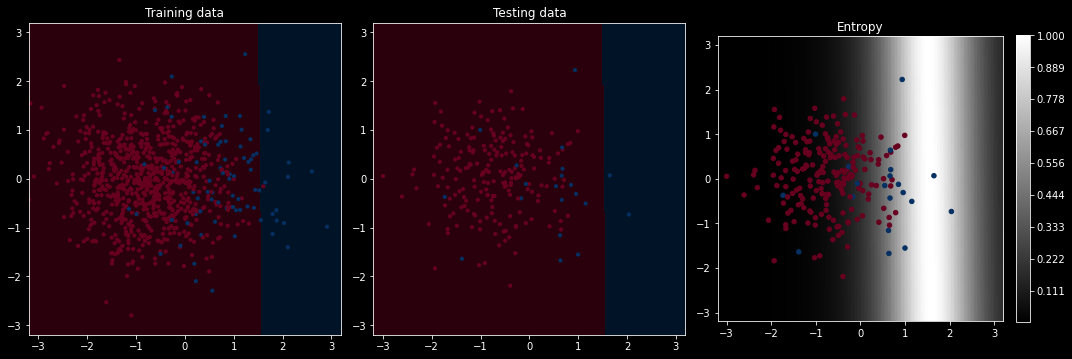

LogisticRegression(class_weight={0: 0.75, 1: 0.25})


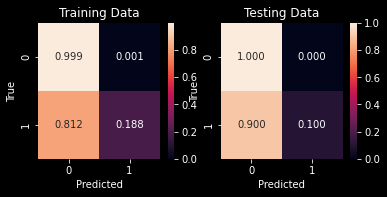

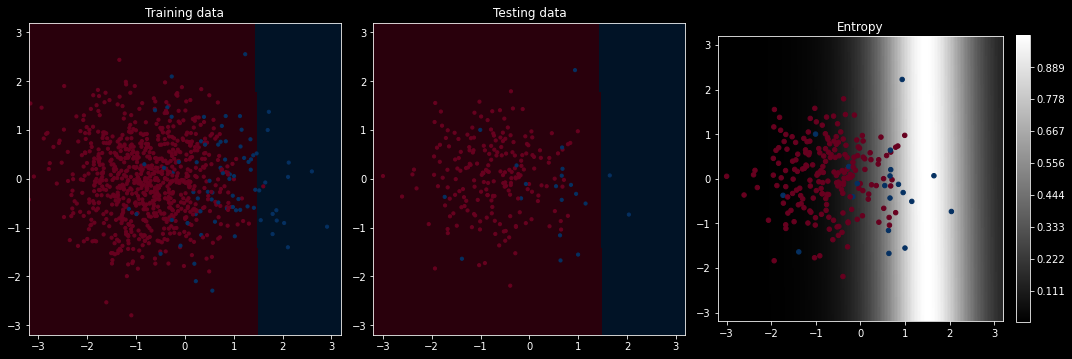

LogisticRegression(class_weight={0: 0.7222222222222222, 1: 0.2777777777777778})


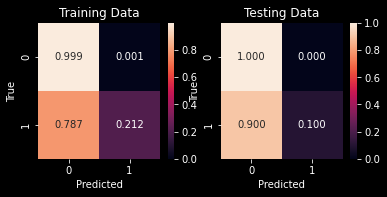

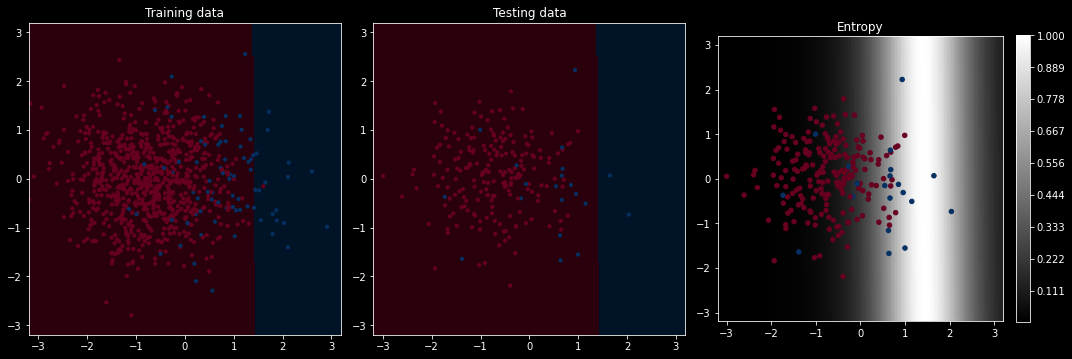

LogisticRegression(class_weight={0: 0.6944444444444444, 1: 0.3055555555555555})


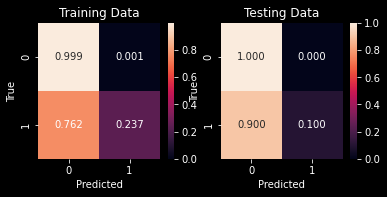

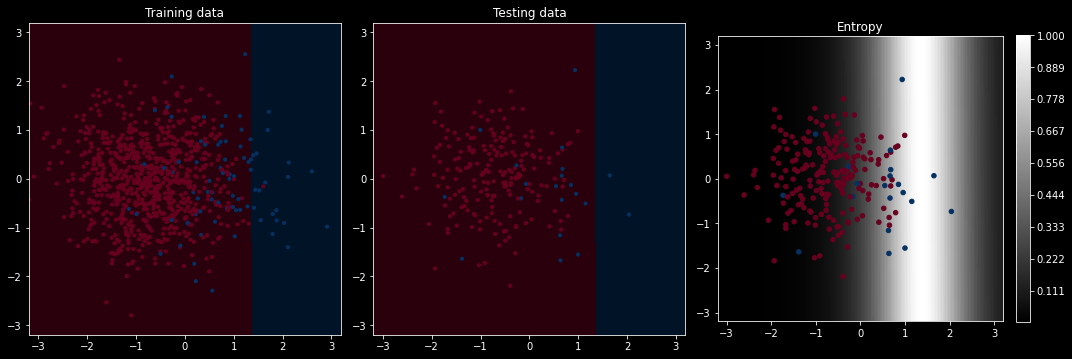

LogisticRegression(class_weight={0: 0.6666666666666667, 1: 0.3333333333333333})


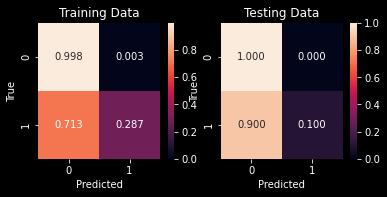

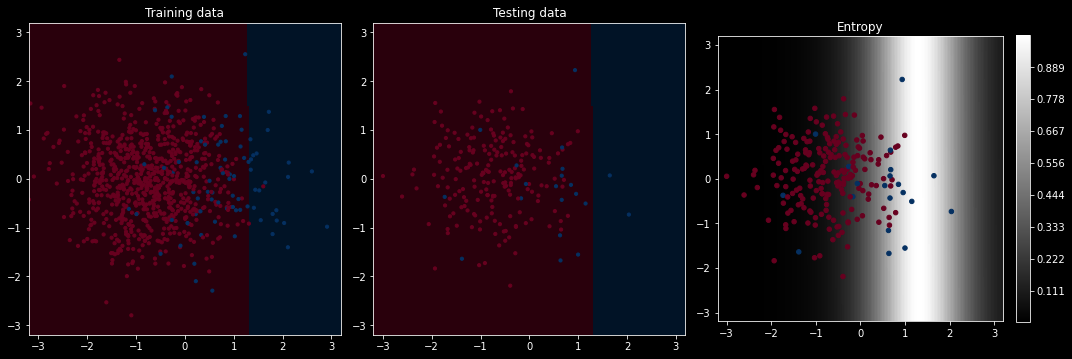

LogisticRegression(class_weight={0: 0.6388888888888888, 1: 0.3611111111111111})


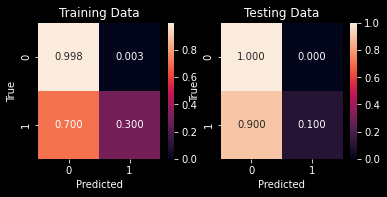

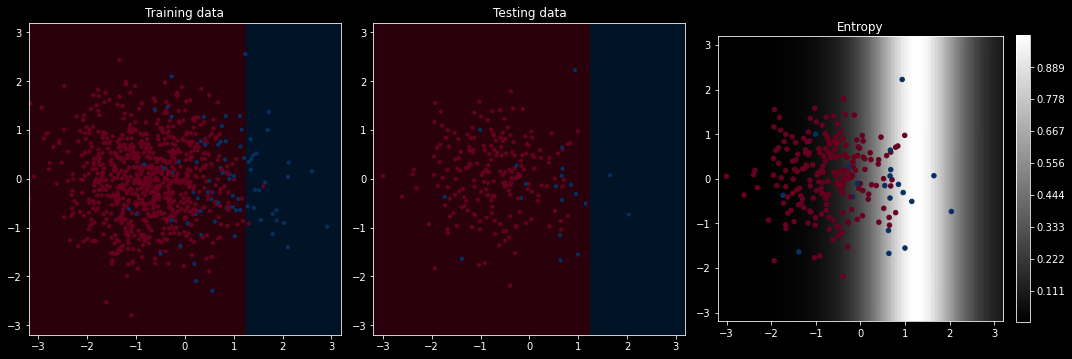

LogisticRegression(class_weight={0: 0.6111111111111112, 1: 0.38888888888888884})


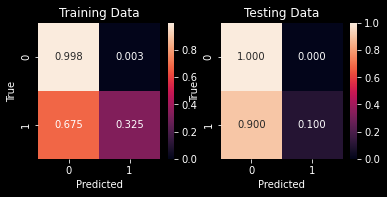

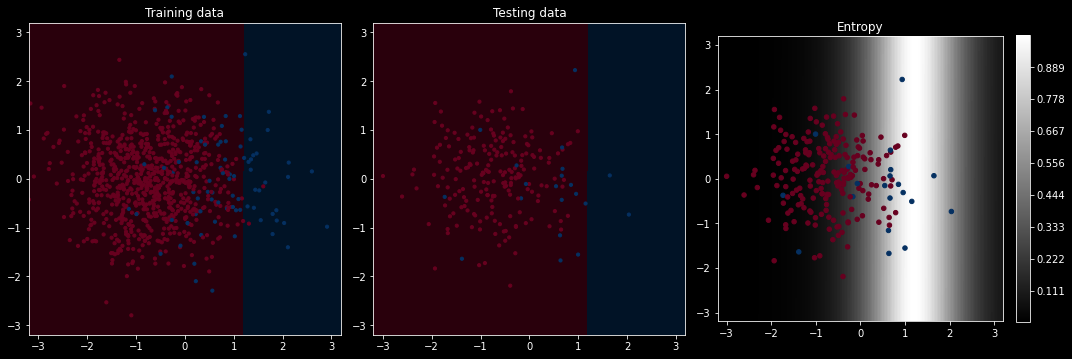

LogisticRegression(class_weight={0: 0.5833333333333334, 1: 0.41666666666666663})


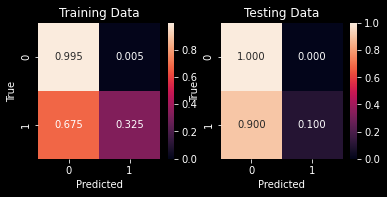

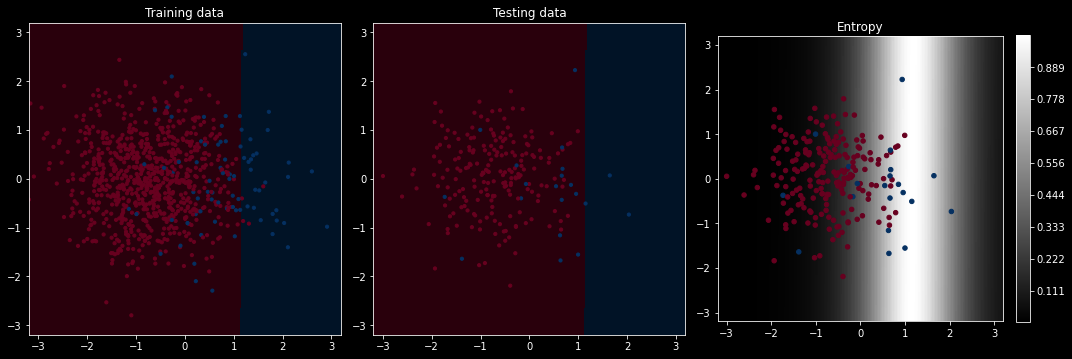

LogisticRegression(class_weight={0: 0.5555555555555556, 1: 0.4444444444444444})


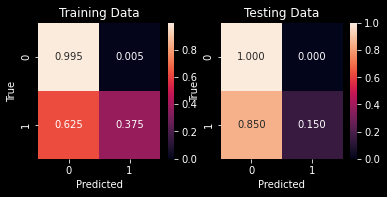

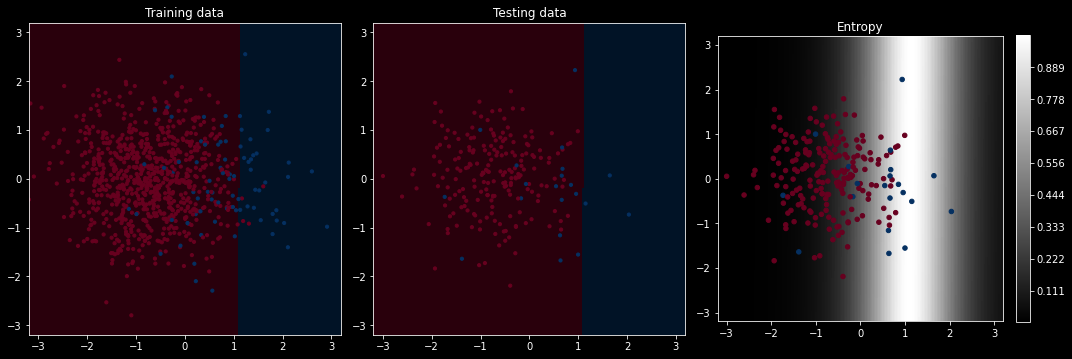

LogisticRegression(class_weight={0: 0.5277777777777778, 1: 0.4722222222222222})


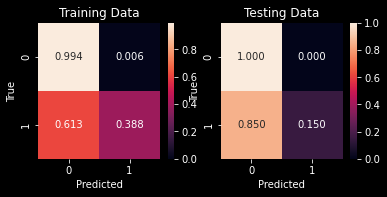

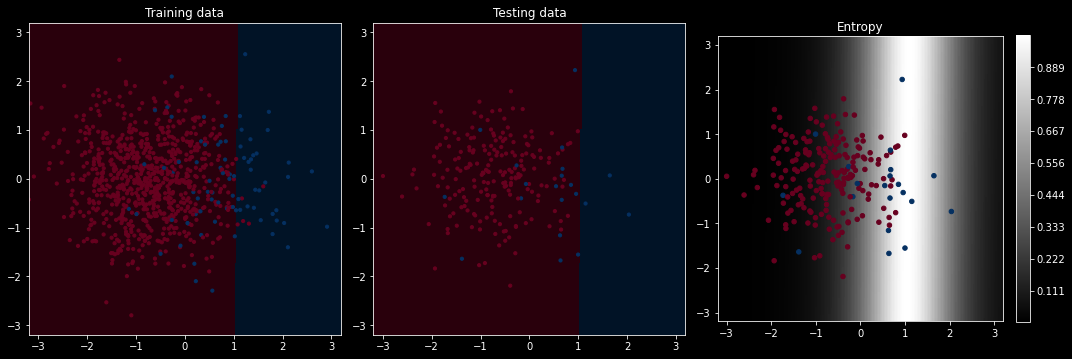

LogisticRegression(class_weight={0: 0.5, 1: 0.5})


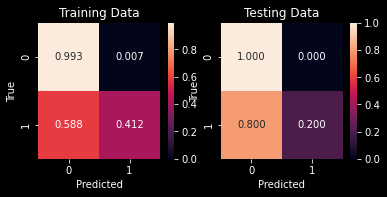

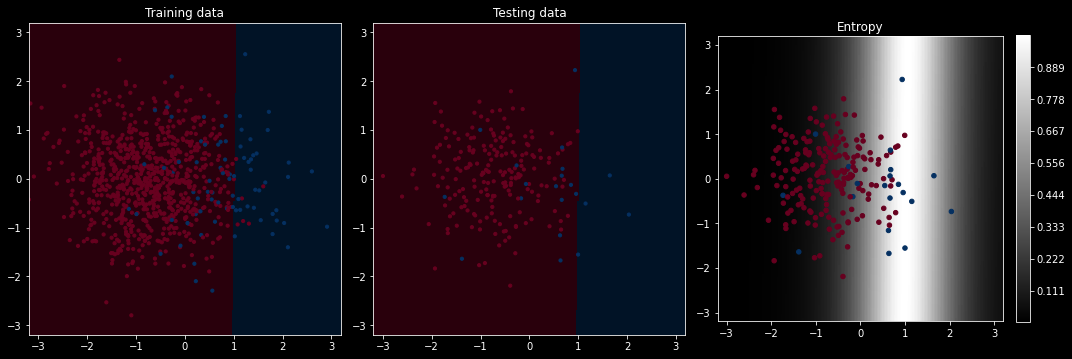

LogisticRegression(class_weight={0: 0.4722222222222222, 1: 0.5277777777777778})


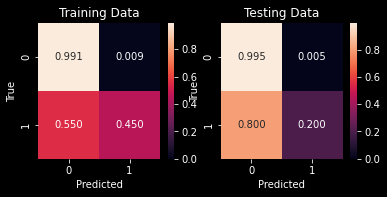

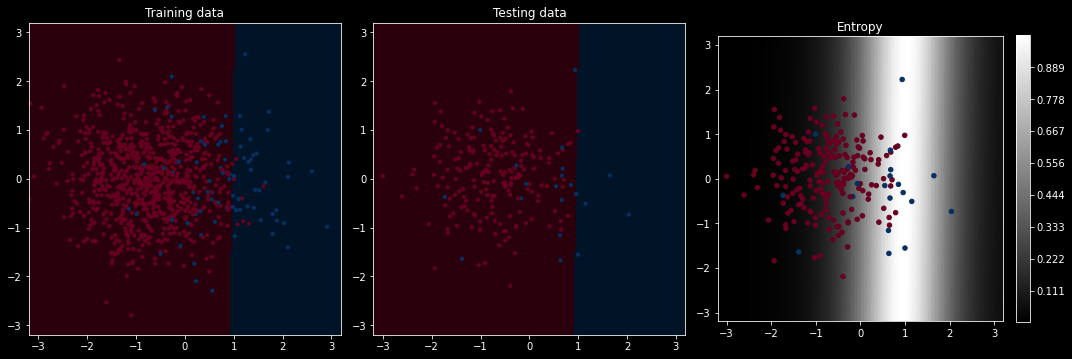

LogisticRegression(class_weight={0: 0.4444444444444444, 1: 0.5555555555555556})


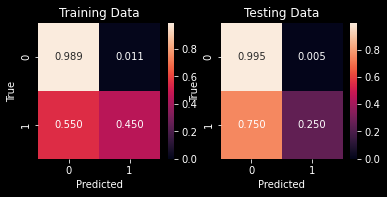

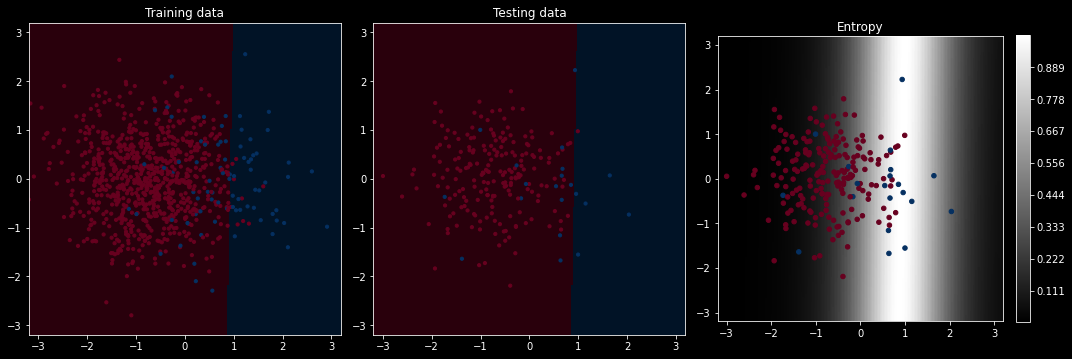

LogisticRegression(class_weight={0: 0.41666666666666674, 1: 0.5833333333333333})


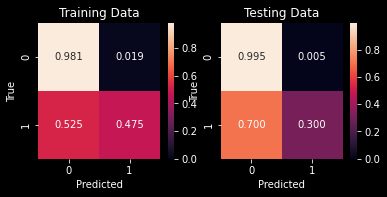

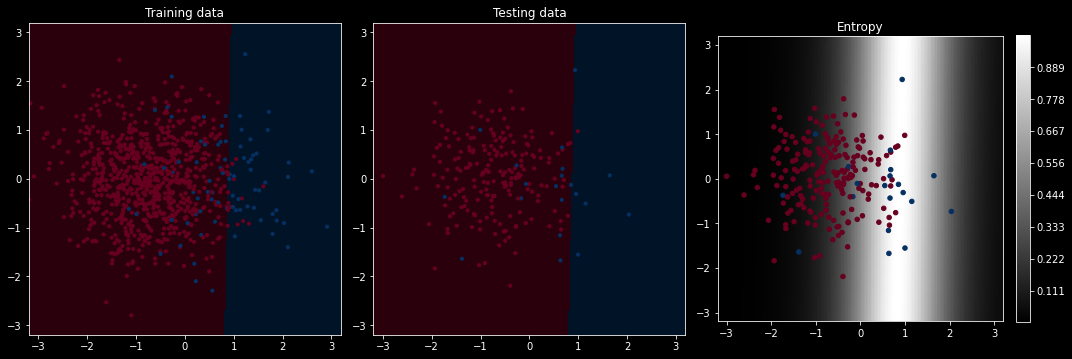

LogisticRegression(class_weight={0: 0.38888888888888895, 1: 0.611111111111111})


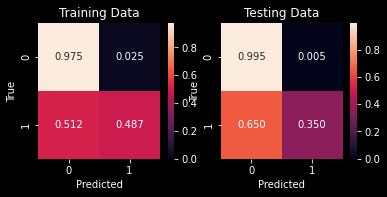

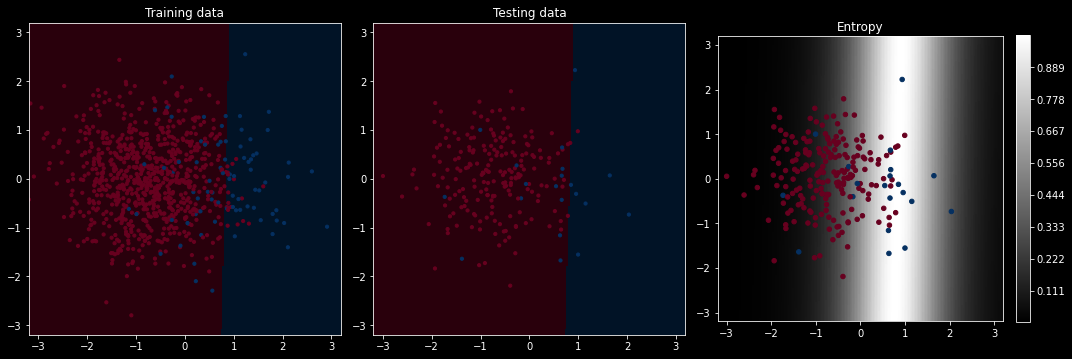

LogisticRegression(class_weight={0: 0.36111111111111116, 1: 0.6388888888888888})


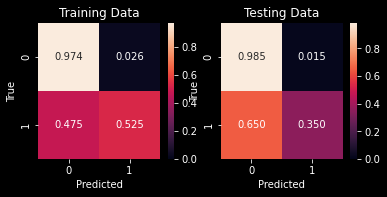

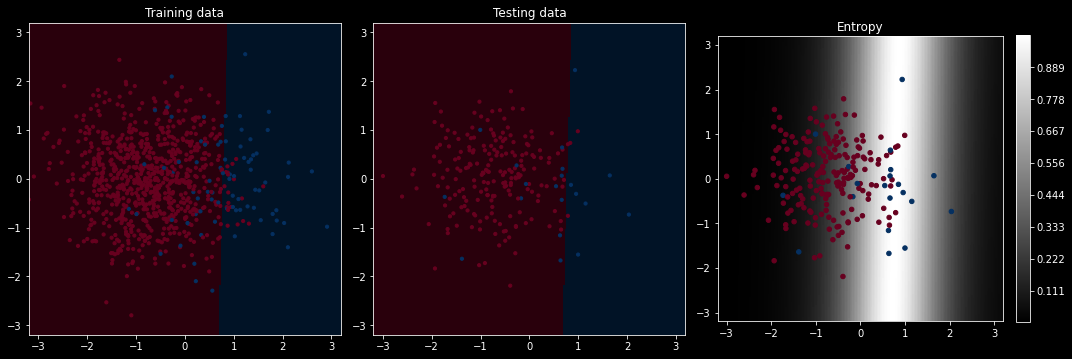

LogisticRegression(class_weight={0: 0.33333333333333337, 1: 0.6666666666666666})


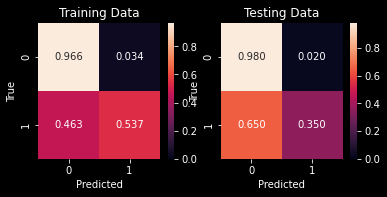

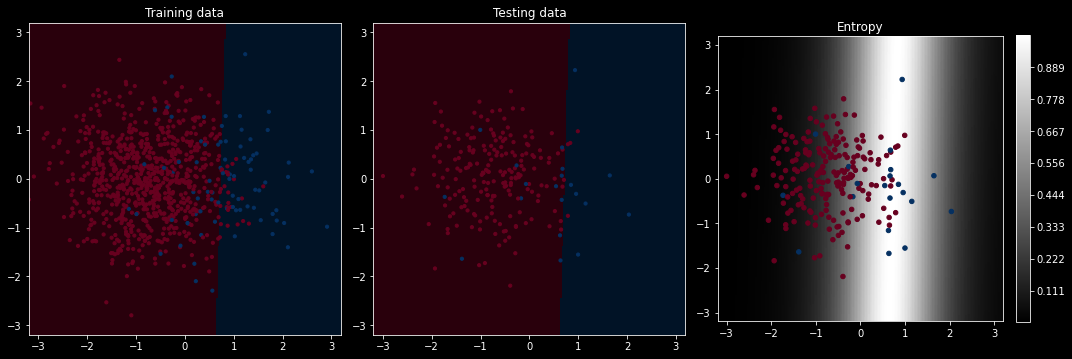

LogisticRegression(class_weight={0: 0.3055555555555556, 1: 0.6944444444444444})


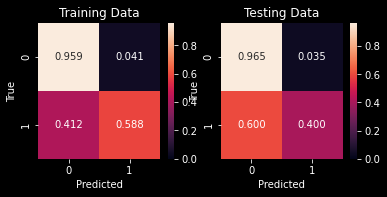

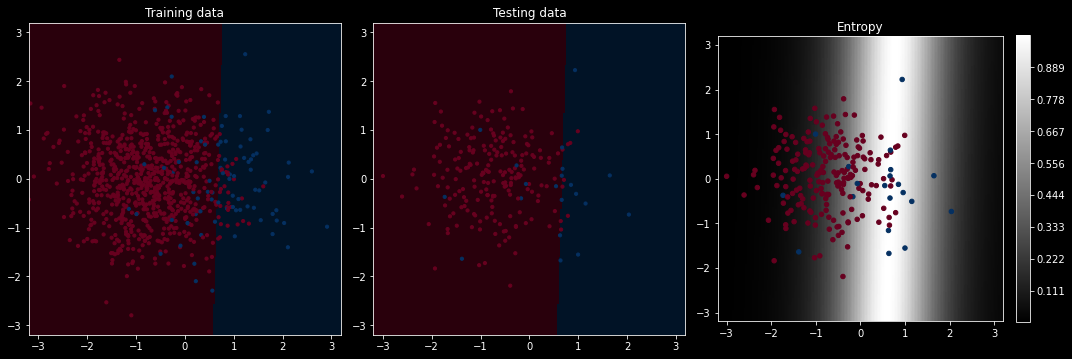

LogisticRegression(class_weight={0: 0.2777777777777778, 1: 0.7222222222222222})


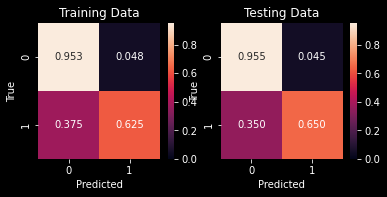

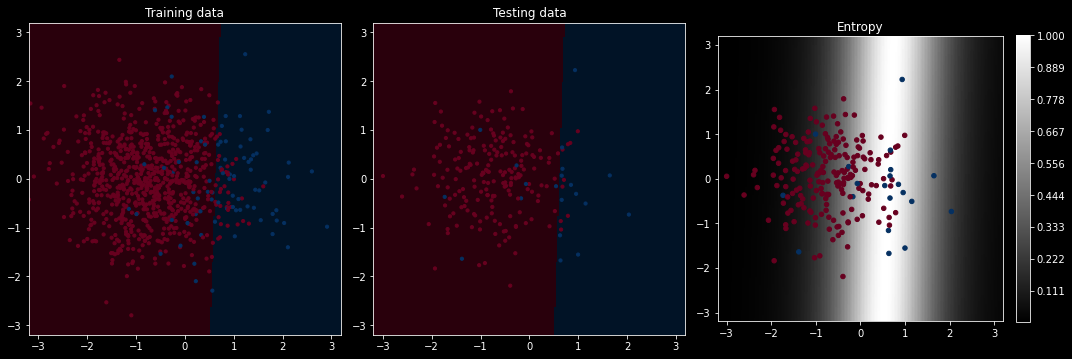

LogisticRegression(class_weight={0: 0.25, 1: 0.75})


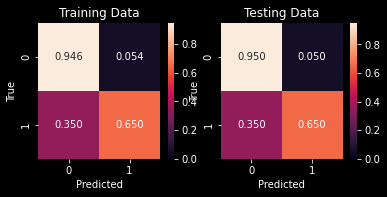

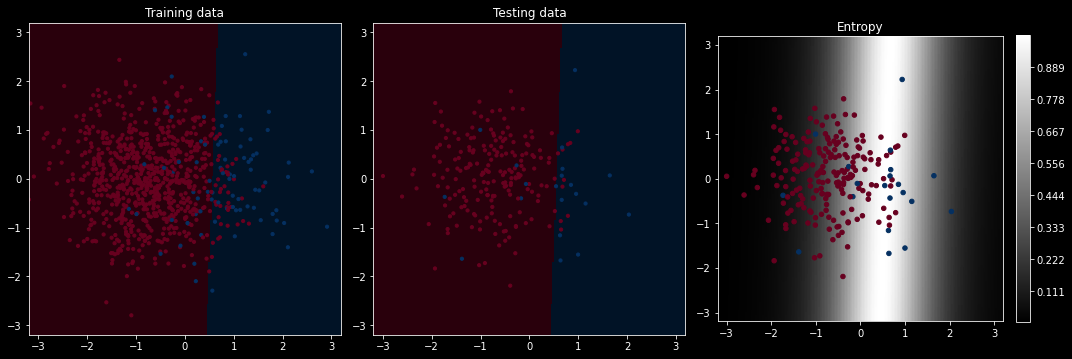

LogisticRegression(class_weight={0: 0.22222222222222232, 1: 0.7777777777777777})


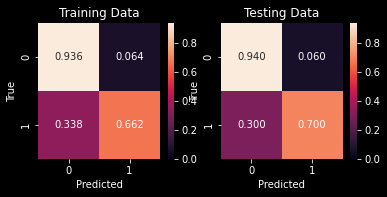

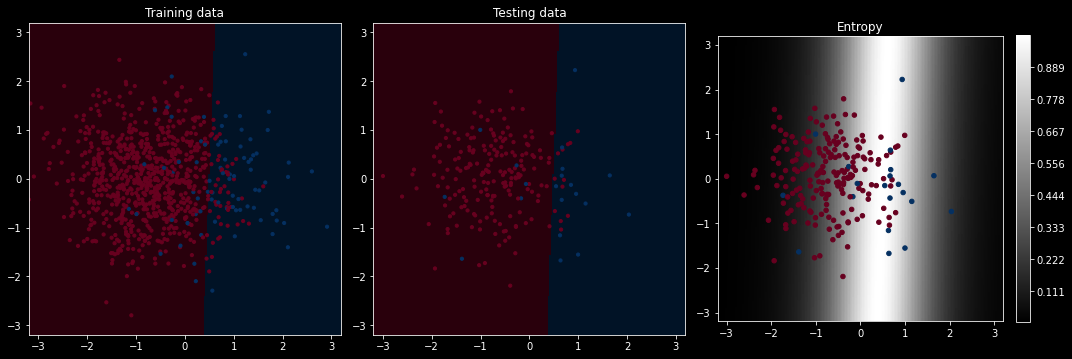

LogisticRegression(class_weight={0: 0.19444444444444453, 1: 0.8055555555555555})


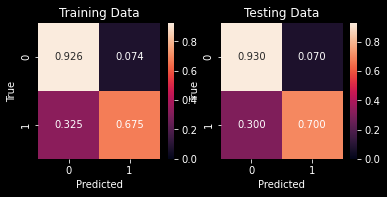

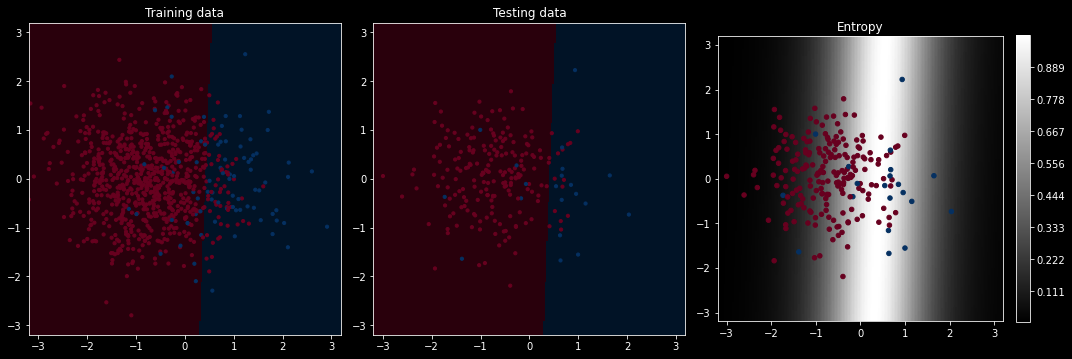

LogisticRegression(class_weight={0: 0.16666666666666674, 1: 0.8333333333333333})


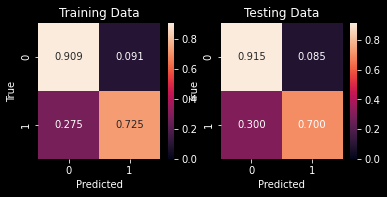

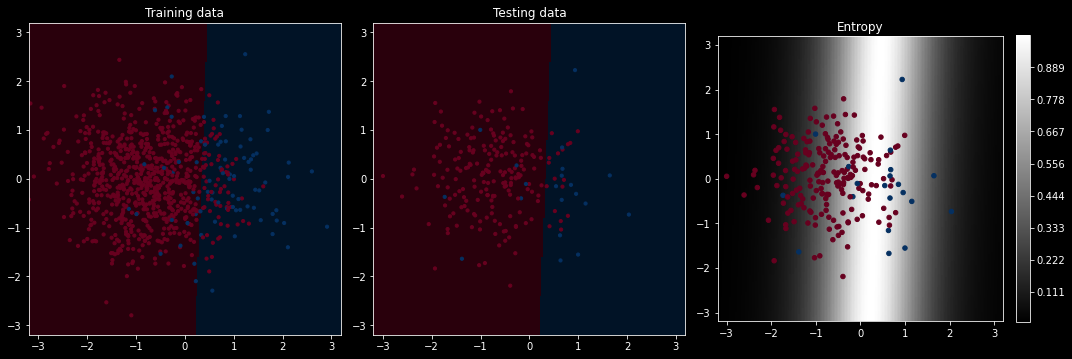

LogisticRegression(class_weight={0: 0.13888888888888895, 1: 0.861111111111111})


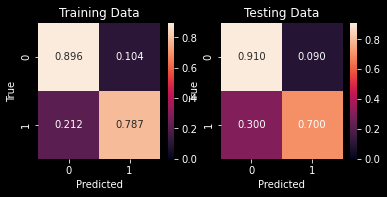

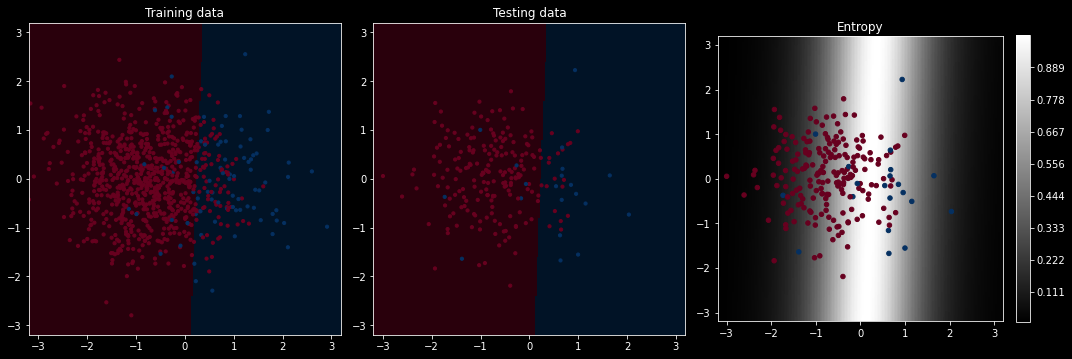

LogisticRegression(class_weight={0: 0.11111111111111116, 1: 0.8888888888888888})


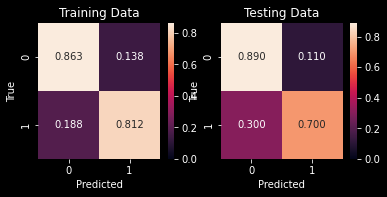

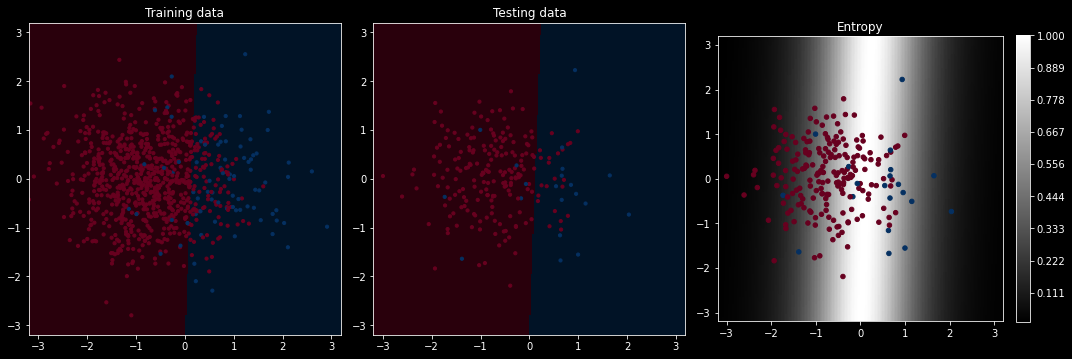

LogisticRegression(class_weight={0: 0.08333333333333337, 1: 0.9166666666666666})


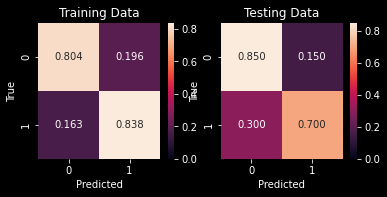

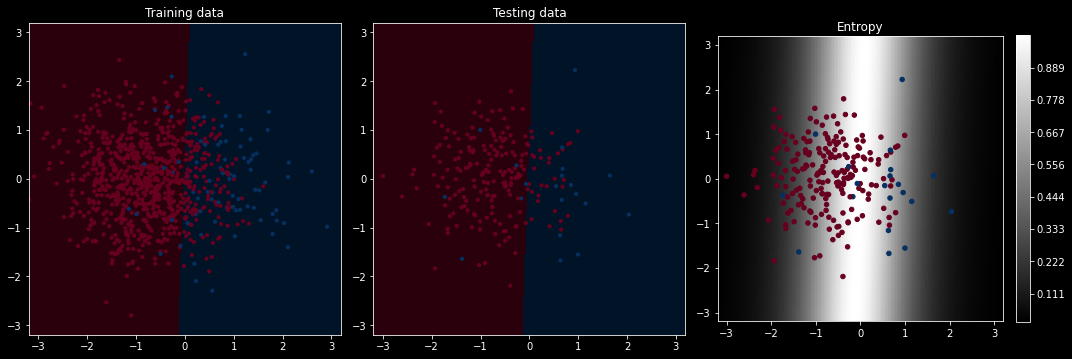

LogisticRegression(class_weight={0: 0.05555555555555558, 1: 0.9444444444444444})


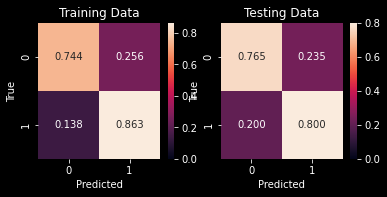

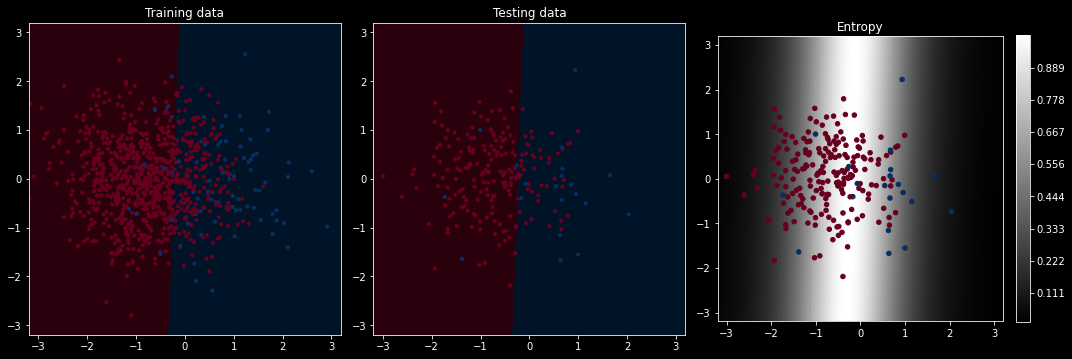

LogisticRegression(class_weight={0: 0.02777777777777779, 1: 0.9722222222222222})


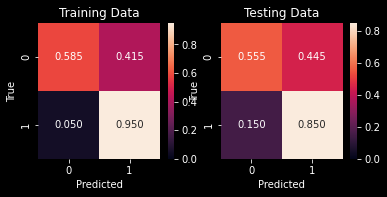

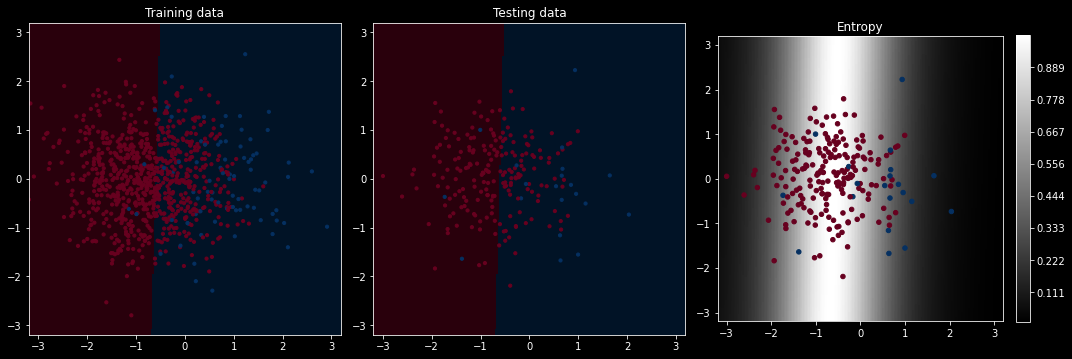

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

n_plot = 35

w = np.linspace(0,1,n_plot+2)[1:-1]

pre = np.zeros((n_plot,2))
rec = np.zeros((n_plot,2))
f1  = np.zeros((n_plot,2))

for i in range(n_plot):
    class_weight = { 0:1-w[i], 1:w[i] }
    model = LogisticRegression(class_weight=class_weight)
    #model = RandomForestClassifier(n_estimators=100, max_leaf_nodes=10, class_weight=class_weight)
    model.fit(X_train, y_train)
    print(model)
    
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    conf_matrix_train = confusion_matrix(y_train, y_train_pred).astype(float)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred).astype(float)
    for j in range(conf_matrix_train.shape[0]):
        conf_matrix_train[j,:] = conf_matrix_train[j,:] / conf_matrix_train[j,:].sum()
        conf_matrix_test[j,:]  = conf_matrix_test[j,:] / conf_matrix_test[j,:].sum()
    # end
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))
    
    sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='.3f', ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")
    axes[0].set_title("Training Data")
    
    sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='.3f', ax=axes[1])
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("True")
    axes[1].set_title("Testing Data")

    plt.show()

    B, S = visualize_regions(model, MAX, 200)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    
    extent = [-MAX,MAX,-MAX,MAX]
    
    cmap = "RdBu"
    axes[0].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap=cmap);
    axes[0].set_aspect('equal')
    axes[0].set_title('Training data');
    
    axes[1].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[1].scatter(X_test[:,0], X_test[:,1], c=y_test, s=10, cmap=cmap);
    axes[1].set_aspect('equal')
    axes[1].set_title('Testing data');
    
    im = axes[2].imshow(S, interpolation='none', extent=extent,cmap='gray')
    axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, s=20, cmap=cmap);
    axes[2].set_aspect('equal')
    axes[2].set_title('Entropy')
    cbar = fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
    cbar.set_ticks(np.linspace(0, math.log(y.max()+1,2), 10))

    plt.tight_layout()
    plt.show()
    
    p, r, f, s = precision_recall_fscore_support(y_test, y_test_pred)
    
    pre[i,0] = p[0]
    pre[i,1] = p[1]
    
    rec[i,0] = r[0]
    rec[i,1] = r[1]
    
    f1[i,0] = f[0]
    f1[i,1] = f[1]
# end

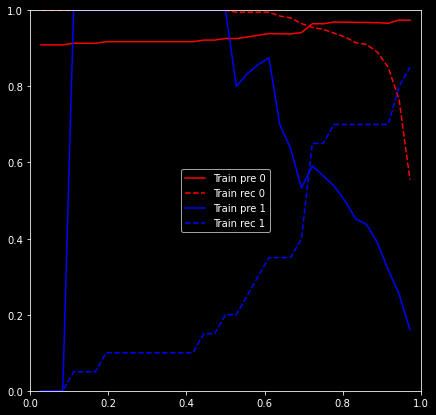

In [7]:
plt.figure(figsize=(7,7));

plt.plot( w, pre[:,0], 'r', label='Train pre 0' )
plt.plot( w, rec[:,0], 'r--', label='Train rec 0' )
plt.plot( w, pre[:,1], 'b', label='Train pre 1' )
plt.plot( w, rec[:,1], 'b--', label='Train rec 1' )
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()